In [13]:
from PIL import Image
from diffusers import StableDiffusionPipeline
import torch
from torchvision import transforms

In [14]:
filename = "../data/mmcelebahq/face/27000.jpg"

In [15]:
pipeline:StableDiffusionPipeline = StableDiffusionPipeline.from_pretrained("../checkpoints/stablev15")
pipeline.safety_checker = None

Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00,  9.02it/s]


In [28]:
raw_im = Image.open(filename)
image_transform = transforms.Compose([
    transforms.PILToTensor(),
    transforms.Lambda(lambda x: x.float() / 255.0),  # 将[0,255]转换为[0,1]
    transforms.Normalize(mean=[0.5], std=[0.5]),     # 将[0,1]转换为[-1,1]
    transforms.Lambda(lambda x: x.unsqueeze(0))      # 添加batch维度
])

torch_data = image_transform(raw_im)  # torch.Size([1, 3, 512, 512])
generator = torch.Generator().manual_seed(42)
with torch.no_grad():
    out = pipeline.vae.forward(torch_data).sample
    print(out.shape)

torch.Size([1, 3, 512, 512])


In [29]:
torch.max(out),torch.min(out)

(tensor(1.0125), tensor(-1.1042))

In [30]:
import numpy as np
out = out * 0.5 + 0.5
out = out * 255
image = out.permute(0,2,3,1).clip(0,255).squeeze().numpy().astype(np.uint8)

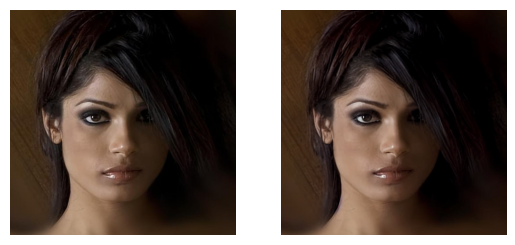

In [31]:
from matplotlib import pyplot as plt
plt.subplot(1,2,1)
plt.imshow(raw_im)
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(image)
plt.axis("off")

plt.show()